In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#read the dataset
df = pd.read_csv('C:\\Users\\pdongre\\Downloads\\HBI_dataset\\raw\\LANGEVIN_DATA.txt', sep = " ")

In [60]:
#read the features and combine them with the dataset
columnsDf = pd.read_csv('C:\\Users\\pdongre\\Downloads\\HBI_dataset\\raw\\columns.csv')
columnsDfT = columnsDf.T.reset_index()
df = df.iloc[: , :-1]
df.columns = columnsDfT.iloc[0]
df

,Time,Occupant Number,Occupancy 1,Occupancy 2,Survey Time,INDOOR Ambient Temp.,INDOOR Relative Humidity,INDOOR Air Velocity,INDOOR Mean Radiant Temp.,INDOOR Lumens,...,BLINDS effectiveness,Reported Discomfort to Management,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Predicted Mean Vote (PMV)
0,735080.010417,1.0,0.0,0.0,NaN,24.584695,63.7040,0.030988,24.584695,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.269505
1,735080.020833,1.0,0.0,0.0,NaN,24.584695,63.8560,0.030988,24.584695,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.268373
2,735080.031250,1.0,0.0,0.0,NaN,24.584695,64.0390,0.030988,24.584695,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.267009
3,735080.041667,1.0,0.0,0.0,NaN,24.498384,64.2820,0.030988,24.498384,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.297025
4,735080.052083,1.0,0.0,0.0,NaN,24.671003,64.5850,0.030988,24.671003,NaN,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.231101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840978,735444.958332,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,735444.968749,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,735444.979165,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,735444.989582,24.0,0.0,0.0,NaN,NaN,31.0155,0.026924,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#simplifying the dataset for comfort and action predictions
df_simple = df[['Occupant Number', 'Gender', 'INDOOR Ambient Temp.', 'INDOOR Mean Radiant Temp.', 'OUTDOOR Ambient Temp.', 
               'Min. Accept. Sensation (right now)', 'Med. Accept. Sensation (right now)', 'Max. Accept. Sensation (right now)', 
               'Thermal Preference (right now)', 'General Thermal Comfort (right now)', 'Thermal Sensation (right now)',
               'Action on THERMOSTAT (recently)']]
df_simple

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),Thermal Preference (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently)
0,1.0,2.0,24.584695,24.584695,23.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1.0,2.0,24.584695,24.584695,23.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,1.0,2.0,24.584695,24.584695,23.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN
3,1.0,2.0,24.498384,24.498384,23.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1.0,2.0,24.671003,24.671003,23.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
840978,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
840979,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
840980,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
840981,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [149]:
#reading instances with survey data
df_survey = df_simple[df['General Thermal Comfort (right now)'] > 0]
df_survey

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),Thermal Preference (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently)
707,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,NaN,4.0,0.0,0.0
719,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,NaN,3.0,-2.5,0.0
735,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,NaN,5.0,0.0,0.0
809,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,NaN,4.0,-1.0,0.0
816,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,NaN,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806854,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,NaN,5.0,0.0,0.0
806870,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,NaN,3.0,-2.0,0.0
806935,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,NaN,4.0,-2.0,0.0
806950,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,NaN,5.0,0.0,0.0


In [150]:
#checking the number of NaN values in the simplified dataset
df_survey.isna().sum()

0
Occupant Number                           0
Gender                                    0
INDOOR Ambient Temp.                     17
INDOOR Mean Radiant Temp.                17
OUTDOOR Ambient Temp.                     0
Min. Accept. Sensation (right now)        0
Med. Accept. Sensation (right now)        0
Max. Accept. Sensation (right now)        0
Thermal Preference (right now)         1930
General Thermal Comfort (right now)       0
Thermal Sensation (right now)             0
Action on THERMOSTAT (recently)           0
dtype: int64

In [151]:
#data cleaning (dropping "thermal preference" feature, filling missing values with knn imputer)
df_survey_drop = df_survey.drop('Thermal Preference (right now)', axis=1)

from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_survey_full = pd.DataFrame(imputer.fit_transform(df_survey_drop),columns = df_survey_drop.columns)
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently)
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,0.0
1,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,0.0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,0.0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,0.0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,0.0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,0.0
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,0.0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,0.0


In [152]:
#checking NaN values
df_survey_full.isna().sum()

0
Occupant Number                        0
Gender                                 0
INDOOR Ambient Temp.                   0
INDOOR Mean Radiant Temp.              0
OUTDOOR Ambient Temp.                  0
Min. Accept. Sensation (right now)     0
Med. Accept. Sensation (right now)     0
Max. Accept. Sensation (right now)     0
General Thermal Comfort (right now)    0
Thermal Sensation (right now)          0
Action on THERMOSTAT (recently)        0
dtype: int64

In [153]:
#checking the dataset
df_survey_full.describe()

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently)
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,12.054888,1.644631,23.203480,23.226368,14.845442,-0.909856,-0.027244,0.872396,4.487179,-0.071715,0.014423
std,6.631179,0.478721,1.454430,1.462103,10.466943,0.913650,0.762116,0.901815,0.844074,0.987124,0.171614
min,1.000000,1.000000,16.392222,16.392222,-5.000000,-3.000000,-2.500000,-2.500000,1.000000,-3.000000,0.000000
25%,6.000000,1.000000,22.443861,22.428228,6.277778,-1.000000,-0.500000,0.000000,4.000000,-1.000000,0.000000
50%,12.000000,2.000000,23.309008,23.319227,12.000000,-1.000000,0.000000,1.000000,5.000000,0.000000,0.000000
75%,17.000000,2.000000,24.054876,24.074673,26.000000,0.000000,0.500000,1.000000,5.000000,0.000000,0.000000
max,24.000000,2.000000,27.751111,27.626135,33.000000,2.000000,2.500000,3.000000,6.000000,3.000000,3.000000


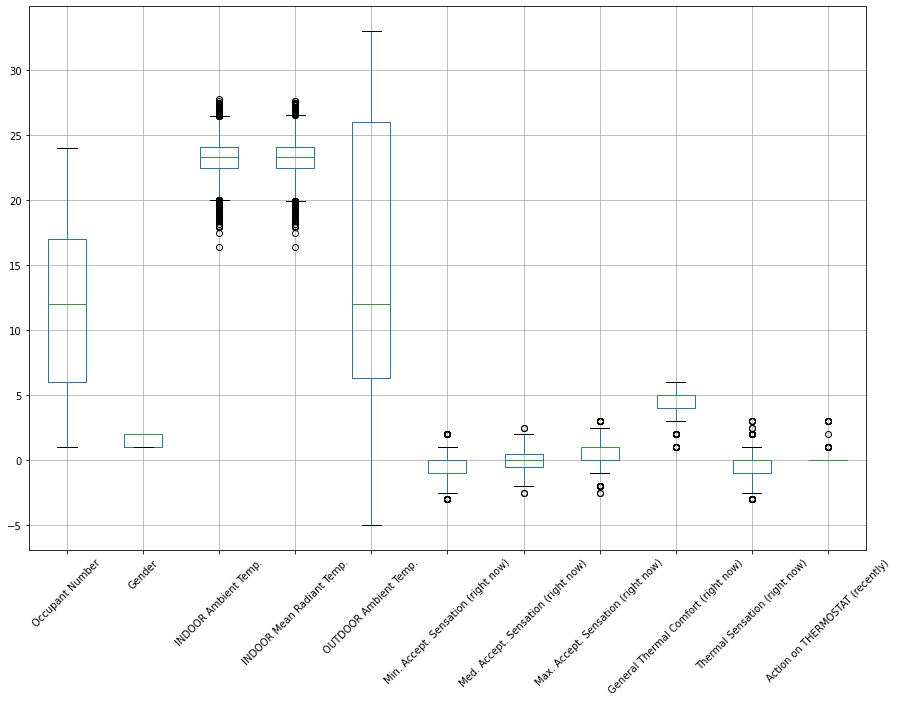

In [154]:
#check for outliers
boxplot = df_survey_full.boxplot(rot=45, figsize=(15, 10))

In [155]:
def detect_outlier(feature):
    outliers = []
    data = df_survey_full[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(y)
    
    print('\nOutlier caps for {}:'.format(feature))
    print('--95p: {:.1f} / {} values exceed that'.format(data.quantile(0.95), len ([i for i in data if i > data.quantile(0.95)])))
    print('--3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('--99p: {:.1f} / {} values exceed that'.format(data.quantile(0.99), len ([i for i in data if i > data.quantile(0.99)])))

In [156]:
#check for outliers
for features in ['INDOOR Ambient Temp.', 'INDOOR Mean Radiant Temp.', 'OUTDOOR Ambient Temp.', 
               'Min. Accept. Sensation (right now)', 'Med. Accept. Sensation (right now)', 'Max. Accept. Sensation (right now)', 
               'General Thermal Comfort (right now)', 'Thermal Sensation (right now)',
               'Action on THERMOSTAT (recently)']:
    detect_outlier(features)


Outlier caps for INDOOR Ambient Temp.:
--95p: 25.5 / 124 values exceed that
--3sd: 27.6 / 24 values exceed that
--99p: 26.7 / 23 values exceed that

Outlier caps for INDOOR Mean Radiant Temp.:
--95p: 25.6 / 125 values exceed that
--3sd: 27.6 / 20 values exceed that
--99p: 26.8 / 25 values exceed that

Outlier caps for OUTDOOR Ambient Temp.:
--95p: 31.0 / 80 values exceed that
--3sd: 46.2 / 0 values exceed that
--99p: 32.0 / 24 values exceed that

Outlier caps for Min. Accept. Sensation (right now):
--95p: 1.0 / 63 values exceed that
--3sd: 1.8 / 63 values exceed that
--99p: 2.0 / 0 values exceed that

Outlier caps for Med. Accept. Sensation (right now):
--95p: 1.0 / 106 values exceed that
--3sd: 2.3 / 4 values exceed that
--99p: 2.0 / 2 values exceed that

Outlier caps for Max. Accept. Sensation (right now):
--95p: 2.0 / 17 values exceed that
--3sd: 3.6 / 39 values exceed that
--99p: 2.0 / 17 values exceed that

Outlier caps for General Thermal Comfort (right now):
--95p: 6.0 / 0 valu

In [157]:
#creating new feature 'indoor operative temp'
df_survey_full['Indoor Operative Temp.'] = (df_survey_full['INDOOR Ambient Temp.'] + df_survey_full['INDOOR Mean Radiant Temp.']) / 2
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,0.0,23.721585
1,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,0.0,23.980518
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,0.0,24.066829
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,0.0,23.290030
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,0.0,23.548963
...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,0.0,23.593889
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,0.0,23.593889
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,0.0,23.231392
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,0.0,24.680556


In [158]:
#creating new feature 'acceptability group'; 0 = cooler, 1 = warmer 
group_mean = df_survey_full['Med. Accept. Sensation (right now)'].mean()
df_survey_full['Acceptability Group'] = np.where(df_survey_full['Med. Accept. Sensation (right now)'] < group_mean, 0, 1)
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,0.0,23.721585,0
1,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,0.0,23.980518,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,0.0,23.548963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,0.0,24.680556,1


In [536]:
#value of group mean
group_mean

-0.027243589743589744

In [159]:
#dropping row with incorrect value
df_survey_full = df_survey_full.drop(1)
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,0.0,23.721585,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,5.0,0.0,0.0,23.807896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,0.0,24.680556,1


In [174]:
df_survey_full['General Thermal Comfort (right now)'].value_counts()

5.0    1265
4.0     755
3.0     277
6.0     158
2.0      33
1.0       7
Name: General Thermal Comfort (right now), dtype: int64

In [176]:
#changing general thermal comfort to binary; replacing labels; 0 = uncomfortable, 1 = comfortable
df_survey_full['General Thermal Comfort (right now)'] = df_survey_full['General Thermal Comfort (right now)'].replace([1, 2, 3, 4], 0)
df_survey_full['General Thermal Comfort (right now)'] = df_survey_full['General Thermal Comfort (right now)'].replace([5, 6], 1)
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,0.0,0.0,0.0,23.721585,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,1.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,0.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,1.0,0.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,1.0,0.0,0.0,23.807896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,1.0,0.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,0.0,-2.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,0.0,-2.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,1.0,0.0,0.0,24.680556,1


In [177]:
df_survey_full['General Thermal Comfort (right now)'].value_counts()

1.0    1423
0.0    1072
Name: General Thermal Comfort (right now), dtype: int64

In [526]:
#Logistic regression to predicts probablilty of comfort
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

#features and targets for comfort prediction
X = df_survey_full[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 
                    'Min. Accept. Sensation (right now)',                     
                    'Max. Accept. Sensation (right now)']]
y = df_survey_full[['General Thermal Comfort (right now)']]

In [527]:
#normalization
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
X_minmax = MinMaxScaler.fit_transform(X)
X_norm = pd.DataFrame(X_minmax, columns=X.columns)

In [534]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6332665330661322


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [535]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2)

logreg_norm = LogisticRegression()
logreg_norm.fit(X_train, y_train)
y_pred = logreg_norm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5851703406813628


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [537]:
print(logreg.coef_, logreg.intercept_)
print(logreg_norm.coef_, logreg_norm.intercept_)

[[-7.75286481e-02 -1.97559082e-04 -4.58729837e-01  3.61371624e-01]] [1.33614283]
[[-0.7833229   0.0818824  -2.23587955  1.94218975]] [0.5052795]


In [272]:
df_survey_full['Action on THERMOSTAT (recently)'].value_counts()

0.0    2472
1.0      16
3.0       6
2.0       1
Name: Action on THERMOSTAT (recently), dtype: int64

In [273]:
#changing action on thermostat to binary; replacing labels; 0 = no action, 1 = action
df_survey_full['Action on THERMOSTAT (recently)'] = df_survey_full['Action on THERMOSTAT (recently)'].replace([1, 2, 3, 4], 1)
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,0.0,0.0,0.0,23.721585,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,1.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,0.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,1.0,0.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,1.0,0.0,0.0,23.807896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,1.0,0.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,0.0,-2.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,0.0,-2.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,1.0,0.0,0.0,24.680556,1


In [274]:
df_survey_full['Action on THERMOSTAT (recently)']. value_counts()

0.0    2472
1.0      23
Name: Action on THERMOSTAT (recently), dtype: int64

In [439]:
#features and targets for action prediction
Xa = df_survey_full[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 
                     'Acceptability Group', 'Gender']]
ya = df_survey_full[['Action on THERMOSTAT (recently)']]

In [440]:
#normalization
Xa_minmax = MinMaxScaler.fit_transform(Xa)
Xa_norm = pd.DataFrame(Xa_minmax, columns=Xa.columns)

In [441]:
#balancing the dataset for action on thermostat
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xa_over, ya_over = oversample.fit_resample(Xa, ya)
ya_over.value_counts()

Action on THERMOSTAT (recently)
0.0                                2472
1.0                                2472
dtype: int64

In [442]:
#balancing the normalized dataset for action on thermostat
Xa_norm_over, ya_norm_over = oversample.fit_resample(Xa_norm, ya)
ya_norm_over.value_counts()

Action on THERMOSTAT (recently)
0.0                                2472
1.0                                2472
dtype: int64

In [532]:
Xa_over_train, Xa_over_test, ya_over_train, ya_over_test = train_test_split(Xa_over, ya_over, test_size = 0.2)

logreg_a = LogisticRegression()
logreg_a.fit(Xa_over_train, ya_over_train)
ya_over_pred = logreg_a.predict(Xa_over_test)
print(accuracy_score(ya_over_test, ya_over_pred))

0.7785642062689585


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [533]:
Xa_norm_over_train, Xa_norm_over_test, ya_norm_over_train, ya_norm_over_test = train_test_split(Xa_norm_over, ya_norm_over, test_size = 0.2)

logreg_a_norm = LogisticRegression()
logreg_a_norm.fit(Xa_norm_over_train, ya_norm_over_train)
ya_norm_over_pred = logreg_a_norm.predict(Xa_norm_over_test)
print(accuracy_score(ya_norm_over_test, ya_norm_over_pred))

0.6582406471183013


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [538]:
print(logreg_a.coef_, logreg_a.intercept_)
print(logreg_a_norm.coef_, logreg_a_norm.intercept_)

[[-0.61301861  0.03191279 -2.69477688 -0.15438674]] [14.77165264]
[[-4.79995777  1.07132981 -0.88537728 -0.25887121]] [2.8709873]


In [449]:
df_survey_full

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,0.0,0.0,0.0,23.721585,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,1.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,0.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,1.0,0.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,1.0,0.0,0.0,23.807896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,1.0,0.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,0.0,-2.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,0.0,-2.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,1.0,0.0,0.0,24.680556,1


In [455]:
df_survey_occ1 = df_survey_full[df_survey_full['Occupant Number'] == 1]
df_survey_occ1

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,0.0,0.0,0.0,23.721585,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,1.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,0.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,1.0,0.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,1.0,0.0,0.0,23.807896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1.0,2.0,23.894207,23.894207,16.0,0.0,1.0,2.0,0.0,-1.0,0.0,23.894207,1
118,1.0,2.0,24.066829,24.066829,18.0,0.0,0.5,1.0,1.0,1.0,0.0,24.066829,1
119,1.0,2.0,23.462655,23.462655,22.0,1.0,1.5,2.0,0.0,-2.0,0.0,23.462655,1
120,1.0,2.0,23.376341,23.376341,23.0,0.0,1.0,2.0,0.0,0.0,0.0,23.376341,1


In [456]:
122 / 4

30.5

In [458]:
#occupant 1 in summer
df_survey_occ1.iloc[:30, :]

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,0.0,0.0,0.0,23.721585,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,1.0,0.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,0.0,-1.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,1.0,0.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,1.0,0.0,0.0,23.807896,0
6,1.0,2.0,23.548963,23.548963,27.0,-2.5,-1.5,0.0,1.0,-1.0,0.0,23.548963,0
7,1.0,2.0,23.980518,23.980518,31.0,-2.0,-1.0,0.0,1.0,0.0,0.0,23.980518,0
8,1.0,2.0,24.066829,24.066829,30.0,-1.0,-0.5,0.0,0.0,1.0,0.0,24.066829,0
9,1.0,2.0,23.376341,23.376341,28.0,-2.5,-1.5,0.0,0.0,1.0,0.0,23.376341,0
10,1.0,2.0,24.066829,24.066829,31.0,-2.0,-0.5,1.0,1.0,0.0,0.0,24.066829,0


In [459]:
#occupant 1 in fall
df_survey_occ1.iloc[30:60, :]

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
31,1.0,2.0,23.376341,23.376341,21.000000,-1.0,0.0,1.0,0.0,0.0,0.0,23.376341,1
32,1.0,2.0,21.127225,21.127225,8.000000,0.0,0.5,1.0,0.0,0.0,0.0,21.127225,1
33,1.0,2.0,22.685591,22.685591,9.000000,0.0,0.5,1.0,0.0,-2.0,0.0,22.685591,1
34,1.0,2.0,22.685591,22.685591,10.000000,0.0,0.5,1.0,0.0,0.0,0.0,22.685591,1
35,1.0,2.0,20.954074,20.954074,9.000000,-1.0,0.0,1.0,0.0,1.0,0.0,20.954074,1
36,1.0,2.0,22.944786,22.944786,11.000000,0.0,0.5,1.0,0.0,0.0,0.0,22.944786,1
37,1.0,2.0,23.031097,23.031097,10.000000,-1.0,0.0,1.0,0.0,1.0,0.0,23.031097,1
38,1.0,2.0,21.646680,21.646680,8.000000,0.0,0.5,1.0,0.0,0.0,0.0,21.646680,1
39,1.0,2.0,22.944786,22.944786,10.000000,0.0,0.5,1.0,0.0,-1.0,0.0,22.944786,1
40,1.0,2.0,23.721585,23.721585,9.000000,-1.0,0.0,1.0,0.0,1.0,0.0,23.721585,1


In [460]:
#occupant 1 in winter
df_survey_occ1.iloc[60:90, :]

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
61,1.0,2.0,22.685591,22.685591,10.0,0.0,1.0,2.0,0.0,0.0,0.0,22.685591,1
62,1.0,2.0,21.300377,21.300377,6.0,-1.0,0.0,1.0,1.0,-1.0,0.0,21.300377,1
63,1.0,2.0,21.992983,21.992983,8.0,1.0,1.5,2.0,0.0,0.0,0.0,21.992983,1
64,1.0,2.0,22.339289,22.339289,10.0,0.0,1.0,2.0,0.0,0.0,0.0,22.339289,1
65,1.0,2.0,21.127225,21.127225,-1.0,0.0,0.5,1.0,1.0,1.0,0.0,21.127225,1
66,1.0,2.0,22.339289,22.339289,1.0,0.0,0.5,1.0,0.0,-2.0,0.0,22.339289,1
67,1.0,2.0,21.733255,21.733255,2.0,0.0,1.0,2.0,0.0,0.0,0.0,21.733255,1
68,1.0,2.0,21.300377,21.300377,4.0,-1.0,0.0,1.0,0.0,0.0,0.0,21.300377,1
69,1.0,2.0,22.339289,22.339289,8.0,0.0,0.5,1.0,1.0,0.0,0.0,22.339289,1
70,1.0,2.0,22.685591,22.685591,12.0,0.0,0.5,1.0,0.0,1.0,0.0,22.685591,1


In [461]:
#occupant 1 in spring
df_survey_occ1.iloc[90:121, :]

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
91,1.0,2.0,21.819831,21.819831,3.000000,1.0,1.5,2.0,0.0,-1.0,0.0,21.819831,1
92,1.0,2.0,22.339289,22.339289,17.000000,-1.0,0.0,1.0,1.0,0.0,0.0,22.339289,1
93,1.0,2.0,23.721585,23.721585,23.000000,0.0,0.5,1.0,1.0,0.0,0.0,23.721585,1
94,1.0,2.0,24.412071,24.412071,23.000000,0.0,0.5,1.0,1.0,1.0,0.0,24.412071,1
95,1.0,2.0,22.685591,22.685591,22.000000,0.0,0.5,1.0,1.0,0.0,0.0,22.685591,1
96,1.0,2.0,23.894207,23.894207,27.166667,-1.0,0.0,1.0,0.0,1.0,0.0,23.894207,1
97,1.0,2.0,24.066829,24.066829,29.000000,-1.0,-0.5,0.0,0.0,1.0,0.0,24.066829,0
98,1.0,2.0,23.203719,23.203719,24.000000,-1.0,-0.5,0.0,0.0,2.0,0.0,23.203719,0
99,1.0,2.0,24.066829,24.066829,30.000000,-1.0,0.0,1.0,1.0,0.0,0.0,24.066829,1
100,1.0,2.0,24.757317,24.757317,31.000000,-1.0,0.0,1.0,1.0,0.0,0.0,24.757317,1


In [494]:
#name of each occupant dataframe
import re
df_survey_occ = ['df_survey_occ' + occ for occ in df_survey_full['Occupant Number'].astype(str)]
df_survey_occ = list(set(df_survey_occ))

def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

df_survey_occ = list(sorted_nicely(df_survey_occ))

#list of all occupant dataframe
df_list = []
for i in range(1, 25):
    df_list.append(df_survey_full[df_survey_full['Occupant Number'] == i])

In [505]:
df_survey_occ1 = pd.DataFrame(df_list[0])
df_survey_occ2 = pd.DataFrame(df_list[1])
df_survey_occ3 = pd.DataFrame(df_list[2])
df_survey_occ4 = pd.DataFrame(df_list[3])
df_survey_occ5 = pd.DataFrame(df_list[4])
df_survey_occ6 = pd.DataFrame(df_list[5])
df_survey_occ7 = pd.DataFrame(df_list[6])
df_survey_occ8 = pd.DataFrame(df_list[7])
df_survey_occ9 = pd.DataFrame(df_list[8])
df_survey_occ10 = pd.DataFrame(df_list[9])
df_survey_occ11 = pd.DataFrame(df_list[10])
df_survey_occ12 = pd.DataFrame(df_list[11])
df_survey_occ13 = pd.DataFrame(df_list[12])
df_survey_occ14 = pd.DataFrame(df_list[13])
df_survey_occ15 = pd.DataFrame(df_list[14])
df_survey_occ16 = pd.DataFrame(df_list[15])
df_survey_occ17 = pd.DataFrame(df_list[16])
df_survey_occ18 = pd.DataFrame(df_list[17])
df_survey_occ19 = pd.DataFrame(df_list[18])
df_survey_occ20 = pd.DataFrame(df_list[19])
df_survey_occ21 = pd.DataFrame(df_list[20])
df_survey_occ22 = pd.DataFrame(df_list[21])
df_survey_occ23 = pd.DataFrame(df_list[22])
df_survey_occ24 = pd.DataFrame(df_list[23])

In [732]:
print('mean occ1 = ', df_survey_occ1['Acceptability Group'].mean())
print('mean occ2 = ', df_survey_occ2['Acceptability Group'].mean())
print('mean occ3 = ', df_survey_occ3['Acceptability Group'].mean())
print('mean occ4 = ', df_survey_occ4['Acceptability Group'].mean())
print('mean occ5 = ', df_survey_occ5['Acceptability Group'].mean())
print('mean occ6 = ', df_survey_occ6['Acceptability Group'].mean())
print('mean occ7 = ', df_survey_occ7['Acceptability Group'].mean())
print('mean occ8 = ', df_survey_occ8['Acceptability Group'].mean())
print('mean occ9 = ', df_survey_occ9['Acceptability Group'].mean())
print('mean occ10 = ', df_survey_occ10['Acceptability Group'].mean())
print('mean occ11 = ', df_survey_occ11['Acceptability Group'].mean())
print('mean occ12 = ', df_survey_occ12['Acceptability Group'].mean())
print('mean occ13 = ', df_survey_occ13['Acceptability Group'].mean())
print('mean occ14 = ', df_survey_occ14['Acceptability Group'].mean())
print('mean occ15 = ', df_survey_occ15['Acceptability Group'].mean())
print('mean occ16 = ', df_survey_occ16['Acceptability Group'].mean())
print('mean occ17 = ', df_survey_occ17['Acceptability Group'].mean())
print('mean occ18 = ', df_survey_occ18['Acceptability Group'].mean())
print('mean occ19 = ', df_survey_occ19['Acceptability Group'].mean())
print('mean occ20 = ', df_survey_occ20['Acceptability Group'].mean())
print('mean occ21 = ', df_survey_occ21['Acceptability Group'].mean())
print('mean occ22 = ', df_survey_occ22['Acceptability Group'].mean())
print('mean occ23 = ', df_survey_occ23['Acceptability Group'].mean())
print('mean occ24 = ', df_survey_occ24['Acceptability Group'].mean())

mean occ1 =  0.7520661157024794
mean occ2 =  0.4634146341463415
mean occ3 =  0.7142857142857143
mean occ4 =  0.9920634920634921
mean occ5 =  0.5702479338842975
mean occ6 =  0.7340425531914894
mean occ7 =  0.4636363636363636
mean occ8 =  0.5803571428571429
mean occ9 =  0.025
mean occ10 =  0.99
mean occ11 =  0.7833333333333333
mean occ12 =  0.956989247311828
mean occ13 =  0.984
mean occ14 =  0.7651515151515151
mean occ15 =  0.9285714285714286
mean occ16 =  1.0
mean occ17 =  1.0
mean occ18 =  0.02631578947368421
mean occ19 =  0.9210526315789473
mean occ20 =  0.0
mean occ21 =  0.8651685393258427
mean occ22 =  0.0
mean occ23 =  0.5891472868217055
mean occ24 =  0.6538461538461539


**6 occupants- occ2, occ7, occ9, occ18, occ20, occ22 have cooler acceptability preferences**

**Remaining 18 occupants have warmer acceptability preferences**

In [738]:
print('mean occ1 = ', df_survey_occ1['Min. Accept. Sensation (right now)'].mean())
print('mean occ2 = ', df_survey_occ2['Min. Accept. Sensation (right now)'].mean())
print('mean occ3 = ', df_survey_occ3['Min. Accept. Sensation (right now)'].mean())
print('mean occ4 = ', df_survey_occ4['Min. Accept. Sensation (right now)'].mean())
print('mean occ5 = ', df_survey_occ5['Min. Accept. Sensation (right now)'].mean())
print('mean occ6 = ', df_survey_occ6['Min. Accept. Sensation (right now)'].mean())
print('mean occ7 = ', df_survey_occ7['Min. Accept. Sensation (right now)'].mean())
print('mean occ8 = ', df_survey_occ8['Min. Accept. Sensation (right now)'].mean())
print('mean occ9 = ', df_survey_occ9['Min. Accept. Sensation (right now)'].mean())
print('mean occ10 = ', df_survey_occ10['Min. Accept. Sensation (right now)'].mean())
print('mean occ11 = ', df_survey_occ11['Min. Accept. Sensation (right now)'].mean())
print('mean occ12 = ', df_survey_occ12['Min. Accept. Sensation (right now)'].mean())
print('mean occ13 = ', df_survey_occ13['Min. Accept. Sensation (right now)'].mean())
print('mean occ14 = ', df_survey_occ14['Min. Accept. Sensation (right now)'].mean())
print('mean occ15 = ', df_survey_occ15['Min. Accept. Sensation (right now)'].mean())
print('mean occ16 = ', df_survey_occ16['Min. Accept. Sensation (right now)'].mean())
print('mean occ17 = ', df_survey_occ17['Min. Accept. Sensation (right now)'].mean())
print('mean occ18 = ', df_survey_occ18['Min. Accept. Sensation (right now)'].mean())
print('mean occ19 = ', df_survey_occ19['Min. Accept. Sensation (right now)'].mean())
print('mean occ20 = ', df_survey_occ20['Min. Accept. Sensation (right now)'].mean())
print('mean occ21 = ', df_survey_occ21['Min. Accept. Sensation (right now)'].mean())
print('mean occ22 = ', df_survey_occ22['Min. Accept. Sensation (right now)'].mean())
print('mean occ23 = ', df_survey_occ23['Min. Accept. Sensation (right now)'].mean())
print('mean occ24 = ', df_survey_occ24['Min. Accept. Sensation (right now)'].mean())

mean occ1 =  -0.40082644628099173
mean occ2 =  -1.5121951219512195
mean occ3 =  0.44360902255639095
mean occ4 =  -0.5317460317460317
mean occ5 =  -1.2685950413223142
mean occ6 =  -1.2659574468085106
mean occ7 =  -1.7
mean occ8 =  -1.1339285714285714
mean occ9 =  -0.95
mean occ10 =  -0.96
mean occ11 =  -1.9833333333333334
mean occ12 =  -0.9032258064516129
mean occ13 =  -0.824
mean occ14 =  -0.4696969696969697
mean occ15 =  -0.6190476190476191
mean occ16 =  0.008333333333333333
mean occ17 =  -1.0
mean occ18 =  -1.2105263157894737
mean occ19 =  -1.0350877192982457
mean occ20 =  -2.0
mean occ21 =  0.10112359550561797
mean occ22 =  -2.125
mean occ23 =  -0.8682170542635659
mean occ24 =  -0.7692307692307693


In [742]:
#mean min accept sensation of cooler acceptability preference occupants 
print('mean_min_accept_cooler =', (-1.5121951219512195 + -1.7 + -0.95 + -1.2105263157894737 + -2 + -2.125)/6)
print('mean_min_accept_warmer =', (-0.40082644628099173 + 0.44360902255639095 + -0.5317460317460317 + -1.2685950413223142 
                                   + -1.2659574468085106 + -1.1339285714285714 + -0.96 + -1.9833333333333334 
                                   + -0.9032258064516129 + -0.824 + -0.4696969696969697 + -0.6190476190476191 
                                   + 0.008333333333333333 + -1.0 + -1.0350877192982457 + 0.10112359550561797 
                                   + -0.8682170542635659 + -0.7692307692307693)/18)

mean_min_accept_cooler = -1.5829535729567823
mean_min_accept_warmer = -0.748879269861844


In [743]:
print('mean occ1 = ', df_survey_occ1['Max. Accept. Sensation (right now)'].mean())
print('mean occ2 = ', df_survey_occ2['Max. Accept. Sensation (right now)'].mean())
print('mean occ3 = ', df_survey_occ3['Max. Accept. Sensation (right now)'].mean())
print('mean occ4 = ', df_survey_occ4['Max. Accept. Sensation (right now)'].mean())
print('mean occ5 = ', df_survey_occ5['Max. Accept. Sensation (right now)'].mean())
print('mean occ6 = ', df_survey_occ6['Max. Accept. Sensation (right now)'].mean())
print('mean occ7 = ', df_survey_occ7['Max. Accept. Sensation (right now)'].mean())
print('mean occ8 = ', df_survey_occ8['Max. Accept. Sensation (right now)'].mean())
print('mean occ9 = ', df_survey_occ9['Max. Accept. Sensation (right now)'].mean())
print('mean occ10 = ', df_survey_occ10['Max. Accept. Sensation (right now)'].mean())
print('mean occ11 = ', df_survey_occ11['Max. Accept. Sensation (right now)'].mean())
print('mean occ12 = ', df_survey_occ12['Max. Accept. Sensation (right now)'].mean())
print('mean occ13 = ', df_survey_occ13['Max. Accept. Sensation (right now)'].mean())
print('mean occ14 = ', df_survey_occ14['Max. Accept. Sensation (right now)'].mean())
print('mean occ15 = ', df_survey_occ15['Max. Accept. Sensation (right now)'].mean())
print('mean occ16 = ', df_survey_occ16['Max. Accept. Sensation (right now)'].mean())
print('mean occ17 = ', df_survey_occ17['Max. Accept. Sensation (right now)'].mean())
print('mean occ18 = ', df_survey_occ18['Max. Accept. Sensation (right now)'].mean())
print('mean occ19 = ', df_survey_occ19['Max. Accept. Sensation (right now)'].mean())
print('mean occ20 = ', df_survey_occ20['Max. Accept. Sensation (right now)'].mean())
print('mean occ21 = ', df_survey_occ21['Max. Accept. Sensation (right now)'].mean())
print('mean occ22 = ', df_survey_occ22['Max. Accept. Sensation (right now)'].mean())
print('mean occ23 = ', df_survey_occ23['Max. Accept. Sensation (right now)'].mean())
print('mean occ24 = ', df_survey_occ24['Max. Accept. Sensation (right now)'].mean())

mean occ1 =  1.1570247933884297
mean occ2 =  0.8780487804878049
mean occ3 =  0.48120300751879697
mean occ4 =  1.9523809523809523
mean occ5 =  0.8429752066115702
mean occ6 =  1.0
mean occ7 =  1.0
mean occ8 =  0.4107142857142857
mean occ9 =  0.0
mean occ10 =  0.97
mean occ11 =  1.8583333333333334
mean occ12 =  1.618279569892473
mean occ13 =  1.704
mean occ14 =  1.2121212121212122
mean occ15 =  0.9047619047619048
mean occ16 =  1.0416666666666667
mean occ17 =  1.0
mean occ18 =  -1.0614035087719298
mean occ19 =  0.9298245614035088
mean occ20 =  1.0
mean occ21 =  0.898876404494382
mean occ22 =  -0.05
mean occ23 =  0.5736434108527132
mean occ24 =  0.4230769230769231


In [744]:
#mean max accept sensation of cooler acceptability preference occupants 
#cooler- occ2, occ7, occ9, occ18, occ20, occ22
print('mean_max_accept_cooler =', (0.8780487804878049+1+0+-1.0614035087719298+1+-0.05)/6)
print('mean_max_accept_warmer =', (1.1570247933884297+0.48120300751879697+1.9523809523809523+0.8429752066115702
                                  +1+0.4107142857142857+0.97+1.8583333333333334
                                  +1.618279569892473+1.704+1.2121212121212122+0.9047619047619048
                                  +1.0416666666666667+1.0+ 0.9298245614035088+0.898876404494382
                                  +0.5736434108527132+0.4230769230769231)/18)

mean_max_accept_cooler = 0.2944408786193125
mean_max_accept_warmer = 1.0543823462342863


In [555]:
df_personal = df[['Chooses set point that maximizes PRODUCTIVITY', 'Chooses set point that maximized COMFORT/PLEASURE', 'Wishes set point to stay at setting they choose', 
                  'Chooses set point that is most agreeable to OTHERS', 'Chooses set point that is most ENERGY EFFICIENT', 'Chooses set point most in line with MGMT policies', 
                  'Choooses set point most TYPICAL of office setting', 'Action on THERMOSTAT (recently)']]
df_personal

,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
1,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
2,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
3,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
4,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
...,...,...,...,...,...,...,...,...
840978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [560]:
df_personal_survey = df_personal[df_personal['Action on THERMOSTAT (recently)'] >= 0]
df_personal_survey

,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
707,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
719,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
735,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
809,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
816,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...
806854,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806870,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806935,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806950,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0


In [558]:
df_personal_survey.isna().sum()

0
Chooses set point that maximizes PRODUCTIVITY         125
Chooses set point that maximized COMFORT/PLEASURE     125
Wishes set point to stay at setting they choose       125
Chooses set point that is most agreeable to OTHERS    125
Chooses set point that is most ENERGY EFFICIENT       125
Chooses set point most in line with MGMT policies     125
Choooses set point most TYPICAL of office setting     125
Action on THERMOSTAT (recently)                         0
dtype: int64

In [563]:
df_personal_survey['Chooses set point that maximizes PRODUCTIVITY'] = df_personal_survey['Chooses set point that maximizes PRODUCTIVITY'].fillna(df_personal_survey['Chooses set point that maximizes PRODUCTIVITY'].mean())
df_personal_survey['Chooses set point that maximized COMFORT/PLEASURE'] = df_personal_survey['Chooses set point that maximized COMFORT/PLEASURE'].fillna(df_personal_survey['Chooses set point that maximized COMFORT/PLEASURE'].mean())
df_personal_survey['Wishes set point to stay at setting they choose'] = df_personal_survey['Wishes set point to stay at setting they choose'].fillna(df_personal_survey['Wishes set point to stay at setting they choose'].mean())
df_personal_survey['Chooses set point that is most agreeable to OTHERS'] = df_personal_survey['Chooses set point that is most agreeable to OTHERS'].fillna(df_personal_survey['Chooses set point that is most agreeable to OTHERS'].mean())
df_personal_survey['Chooses set point that is most ENERGY EFFICIENT'] = df_personal_survey['Chooses set point that is most ENERGY EFFICIENT'].fillna(df_personal_survey['Chooses set point that is most ENERGY EFFICIENT'].mean())
df_personal_survey['Chooses set point most in line with MGMT policies'] = df_personal_survey['Chooses set point most in line with MGMT policies'].fillna(df_personal_survey['Chooses set point most in line with MGMT policies'].mean())
df_personal_survey['Choooses set point most TYPICAL of office setting'] = df_personal_survey['Choooses set point most TYPICAL of office setting'].fillna(df_personal_survey['Choooses set point most TYPICAL of office setting'].mean())

C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\3857341517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_survey['Chooses set point that maximizes PRODUCTIVITY'] = df_personal_survey['Chooses set point that maximizes PRODUCTIVITY'].fillna(df_personal_survey['Chooses set point that maximizes PRODUCTIVITY'].mean())
C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\3857341517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_survey['Chooses set point that maximized COMFORT/

In [564]:
df_personal_survey['Action on THERMOSTAT (recently)'].value_counts()

0.0    2474
1.0      16
3.0       6
2.0       1
Name: Action on THERMOSTAT (recently), dtype: int64

In [565]:
#changing action on thermostat to binary; replacing labels; 0 = no action, 1 = action
df_personal_survey['Action on THERMOSTAT (recently)'] = df_personal_survey['Action on THERMOSTAT (recently)'].replace([1, 2, 3, 4], 1)
df_personal_survey

C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\2764783406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personal_survey['Action on THERMOSTAT (recently)'] = df_personal_survey['Action on THERMOSTAT (recently)'].replace([1, 2, 3, 4], 1)


,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
707,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
719,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
735,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
809,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
816,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...
806854,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806870,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806935,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806950,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0


In [566]:
df_personal_survey['Action on THERMOSTAT (recently)'].value_counts()

0.0    2474
1.0      23
Name: Action on THERMOSTAT (recently), dtype: int64

In [567]:
#features and targets for action prediction
Xp = df_personal_survey[['Chooses set point that maximizes PRODUCTIVITY', 'Chooses set point that maximized COMFORT/PLEASURE', 'Wishes set point to stay at setting they choose', 
                         'Chooses set point that is most agreeable to OTHERS', 'Chooses set point that is most ENERGY EFFICIENT', 'Chooses set point most in line with MGMT policies', 
                         'Choooses set point most TYPICAL of office setting']]
yp = df_personal_survey[['Action on THERMOSTAT (recently)']]

In [568]:
#normalization
Xp_minmax = MinMaxScaler.fit_transform(Xp)
Xp_norm = pd.DataFrame(Xp_minmax, columns=Xp.columns)

In [569]:
#balancing the dataset for action on thermostat
Xp_over, yp_over = oversample.fit_resample(Xp, yp)
yp_over.value_counts()

Action on THERMOSTAT (recently)
0.0                                2474
1.0                                2474
dtype: int64

In [570]:
#balancing the normalized dataset for action on thermostat
Xp_norm_over, yp_norm_over = oversample.fit_resample(Xp_norm, yp)
yp_norm_over.value_counts()

Action on THERMOSTAT (recently)
0.0                                2474
1.0                                2474
dtype: int64

In [571]:
Xp_over_train, Xp_over_test, yp_over_train, yp_over_test = train_test_split(Xp_over, yp_over, test_size = 0.2)

logreg_p = LogisticRegression()
logreg_p.fit(Xp_over_train, yp_over_train)
yp_over_pred = logreg_p.predict(Xp_over_test)
print(accuracy_score(yp_over_test, yp_over_pred))

0.9131313131313131


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [574]:
Xp_norm_over_train, Xp_norm_over_test, yp_norm_over_train, yp_norm_over_test = train_test_split(Xp_norm_over, yp_norm_over, test_size = 0.2)

logreg_p_norm = LogisticRegression()
logreg_p_norm.fit(Xp_norm_over_train, yp_norm_over_train)
yp_norm_over_pred = logreg_p_norm.predict(Xp_norm_over_test)
print(accuracy_score(yp_norm_over_test, yp_norm_over_pred))

0.8747474747474747


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [598]:
df_simple1 = df[['Occupant Number', 'Gender', 'INDOOR Ambient Temp.', 'INDOOR Mean Radiant Temp.', 'OUTDOOR Ambient Temp.', 
                 'Min. Accept. Sensation (right now)', 'Med. Accept. Sensation (right now)', 'Max. Accept. Sensation (right now)', 
                 'General Thermal Comfort (right now)', 'Thermal Sensation (right now)',
                 'Chooses set point that maximizes PRODUCTIVITY', 'Chooses set point that maximized COMFORT/PLEASURE', 'Wishes set point to stay at setting they choose', 
                 'Chooses set point that is most agreeable to OTHERS', 'Chooses set point that is most ENERGY EFFICIENT', 'Chooses set point most in line with MGMT policies', 
                 'Choooses set point most TYPICAL of office setting', 'Action on THERMOSTAT (recently)']]
df_simple1

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
0,1.0,2.0,24.584695,24.584695,23.0,-1.0,0.0,0.0,NaN,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
1,1.0,2.0,24.584695,24.584695,23.0,-1.0,0.0,0.0,NaN,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
2,1.0,2.0,24.584695,24.584695,23.0,-1.0,0.0,0.0,NaN,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
3,1.0,2.0,24.498384,24.498384,23.0,-1.0,0.0,0.0,NaN,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
4,1.0,2.0,24.671003,24.671003,23.0,-1.0,0.0,0.0,NaN,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840978,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840979,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840980,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840981,24.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [599]:
df_survey1 = df_simple1[df_simple1['General Thermal Comfort (right now)'] > 0]
df_survey1

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
707,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
719,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
735,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
809,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
816,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806854,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806870,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806935,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
806950,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0


In [600]:
df_survey1.isna().sum()

0
Occupant Number                                         0
Gender                                                  0
INDOOR Ambient Temp.                                   17
INDOOR Mean Radiant Temp.                              17
OUTDOOR Ambient Temp.                                   0
Min. Accept. Sensation (right now)                      0
Med. Accept. Sensation (right now)                      0
Max. Accept. Sensation (right now)                      0
General Thermal Comfort (right now)                     0
Thermal Sensation (right now)                           0
Chooses set point that maximizes PRODUCTIVITY         125
Chooses set point that maximized COMFORT/PLEASURE     125
Wishes set point to stay at setting they choose       125
Chooses set point that is most agreeable to OTHERS    125
Chooses set point that is most ENERGY EFFICIENT       125
Chooses set point most in line with MGMT policies     125
Choooses set point most TYPICAL of office setting     125
Action on TH

In [601]:
df_survey1 = pd.DataFrame(imputer.fit_transform(df_survey1), columns = df_survey1.columns)
df_survey1

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
1,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0


In [602]:
df_survey1.isna().sum()

0
Occupant Number                                       0
Gender                                                0
INDOOR Ambient Temp.                                  0
INDOOR Mean Radiant Temp.                             0
OUTDOOR Ambient Temp.                                 0
Min. Accept. Sensation (right now)                    0
Med. Accept. Sensation (right now)                    0
Max. Accept. Sensation (right now)                    0
General Thermal Comfort (right now)                   0
Thermal Sensation (right now)                         0
Chooses set point that maximizes PRODUCTIVITY         0
Chooses set point that maximized COMFORT/PLEASURE     0
Wishes set point to stay at setting they choose       0
Chooses set point that is most agreeable to OTHERS    0
Chooses set point that is most ENERGY EFFICIENT       0
Chooses set point most in line with MGMT policies     0
Choooses set point most TYPICAL of office setting     0
Action on THERMOSTAT (recently)               

In [603]:
df_survey1.describe()

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently)
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,12.054888,1.644631,23.200333,23.223221,14.845442,-0.909856,-0.027244,0.872396,4.487179,-0.071715,2.731651,2.794071,2.223878,3.519311,2.472436,3.049119,3.110256,0.014423
std,6.631179,0.478721,1.456138,1.463852,10.466943,0.913650,0.762116,0.901815,0.844074,0.987124,1.874189,1.914618,1.810309,1.724963,1.859043,2.056151,1.788906,0.171614
min,1.000000,1.000000,16.392222,16.392222,-5.000000,-3.000000,-2.500000,-2.500000,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,22.439827,22.424773,6.277778,-1.000000,-0.500000,0.000000,4.000000,-1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,2.000000,0.000000
50%,12.000000,2.000000,23.308889,23.317064,12.000000,-1.000000,0.000000,1.000000,5.000000,0.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,0.000000
75%,17.000000,2.000000,24.054876,24.074673,26.000000,0.000000,0.500000,1.000000,5.000000,0.000000,4.400000,5.000000,3.000000,5.000000,4.000000,5.000000,4.000000,0.000000
max,24.000000,2.000000,27.751111,27.626135,33.000000,2.000000,2.500000,3.000000,6.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000


In [604]:
df_survey1['Indoor Operative Temp.'] = (df_survey1['INDOOR Ambient Temp.'] + df_survey1['INDOOR Mean Radiant Temp.']) / 2
df_survey1['Acceptability Group'] = np.where(df_survey1['Med. Accept. Sensation (right now)'] < group_mean, 0, 1)
df_survey1

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
0,1.0,2.0,23.721585,23.721585,28.0,-2.5,-1.5,0.0,4.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.721585,0
1,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.980518,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.548963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,24.680556,1


In [605]:
df_survey1 = df_survey1.drop(0)
df_survey1

,Occupant Number,Gender,INDOOR Ambient Temp.,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,Min. Accept. Sensation (right now),Med. Accept. Sensation (right now),Max. Accept. Sensation (right now),General Thermal Comfort (right now),Thermal Sensation (right now),Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Action on THERMOSTAT (recently),Indoor Operative Temp.,Acceptability Group
1,1.0,2.0,23.980518,23.980518,30.0,-2.0,-1.0,0.0,3.0,-2.5,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.980518,0
2,1.0,2.0,24.066829,24.066829,32.0,-2.0,-1.0,0.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,24.066829,0
3,1.0,2.0,23.290030,23.290030,27.0,-2.0,-0.5,1.0,4.0,-1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.290030,0
4,1.0,2.0,23.548963,23.548963,28.0,-2.0,-0.5,1.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.548963,0
5,1.0,2.0,23.807896,23.807896,29.0,-2.0,-1.0,0.0,5.0,0.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,23.807896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,24.0,2.0,23.593889,23.593889,31.0,-1.0,-0.5,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,23.593889,0
2492,24.0,2.0,23.593889,23.593889,30.0,0.0,0.0,0.0,3.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,23.593889,1
2493,24.0,2.0,23.231392,23.231392,26.0,-1.0,-0.5,0.0,4.0,-2.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,23.231392,0
2494,24.0,2.0,24.680556,24.680556,31.0,0.0,0.0,0.0,5.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,0.0,24.680556,1


In [606]:
df_survey1['General Thermal Comfort (right now)'] = df_survey1['General Thermal Comfort (right now)'].replace([1, 2, 3, 4], 0)
df_survey1['General Thermal Comfort (right now)'] = df_survey1['General Thermal Comfort (right now)'].replace([5, 6], 1)
df_survey1['General Thermal Comfort (right now)'].value_counts()

1.0    1423
0.0    1072
Name: General Thermal Comfort (right now), dtype: int64

In [2]:
df_survey1['Action on THERMOSTAT (recently)'] = df_survey1['Action on THERMOSTAT (recently)'].replace([1, 2, 3, 4], 1)
df_survey1['Action on THERMOSTAT (recently)'].value_counts()

NameError: name 'df_survey1' is not defined

In [733]:
X1 = df_survey1[['Indoor Operative Temp.', 'OUTDOOR Ambient Temp.', 'Acceptability Group', 'Gender', 
                'Wishes set point to stay at setting they choose', 'Chooses set point that is most agreeable to OTHERS', 
                #'Chooses set point that is most ENERGY EFFICIENT', 'Chooses set point most in line with MGMT policies'
                ]]
y1 = df_survey1[['Action on THERMOSTAT (recently)']]

In [734]:
X1_over, y1_over = oversample.fit_resample(X1, y1)
y1_over.value_counts()

Action on THERMOSTAT (recently)
0.0                                2472
1.0                                2472
dtype: int64

In [735]:
X1_over_train, X1_over_test, y1_over_train, y1_over_test = train_test_split(X1_over, y1_over, test_size = 0.25)

logreg_1 = LogisticRegression()
logreg_1.fit(X1_over_train, y1_over_train)
y1_over_pred = logreg_1.predict(X1_over_test)
print(accuracy_score(y1_over_test, y1_over_pred))

0.8915857605177994


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [712]:
print(logreg_1.coef_, logreg_1.intercept_)

[[-0.61946534 -0.01302019 -3.71358984  1.44637107  0.96187276 -0.69039991
   1.62602254 -0.59123094]] [8.72430852]


In [623]:
df_surveyp = df_survey1[['Chooses set point that maximizes PRODUCTIVITY', 'Chooses set point that maximized COMFORT/PLEASURE', 'Wishes set point to stay at setting they choose', 
                         'Chooses set point that is most agreeable to OTHERS', 'Chooses set point that is most ENERGY EFFICIENT', 'Chooses set point most in line with MGMT policies', 
                         'Choooses set point most TYPICAL of office setting']]
df_surveyp.index = df_survey1['Occupant Number']
df_surveyp

,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting
Occupant Number,,,,,,,
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...
24.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0
24.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0
24.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0


In [646]:
import sklearn.cluster
km = sklearn.cluster.KMeans()
labels = km.fit_predict(df_surveyp)
labelsDf = pd.DataFrame(labels, columns=['cluster'])
labelsDf.index = df_surveyp.index
labelsDf

,cluster
Occupant Number,
1.0,4
1.0,4
1.0,4
1.0,4
1.0,4
...,...
24.0,2
24.0,2
24.0,2


In [648]:
labelsDf['occupant number'] = labelsDf.index 
labelsDf.drop_duplicates(subset=['occupant number'])

,cluster,occupant number
Occupant Number,,
1.0,4,1.0
2.0,1,2.0
3.0,0,3.0
4.0,0,4.0
5.0,0,5.0
6.0,3,6.0
7.0,1,7.0
8.0,3,8.0
9.0,2,9.0


In [633]:
df_surveyp['cluster'] = labelsDf['cluster']
df_surveyp

C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\4190008547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surveyp['cluster'] = labelsDf['cluster']


,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,cluster
Occupant Number,,,,,,,,
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,6
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,6
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,6
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,6
1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,6
...,...,...,...,...,...,...,...,...
24.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,7
24.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,7
24.0,2.0,5.0,2.0,4.0,4.0,0.0,5.0,7


In [665]:
df_surveyp1 = df_survey1[['Wishes set point to stay at setting they choose', 'Chooses set point that is most agreeable to OTHERS']]
df_surveyp1.index = df_survey1['Occupant Number']
df_surveyp1

,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS
Occupant Number,,
1.0,2.0,4.0
1.0,2.0,4.0
1.0,2.0,4.0
1.0,2.0,4.0
1.0,2.0,4.0
...,...,...
24.0,2.0,4.0
24.0,2.0,4.0
24.0,2.0,4.0


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


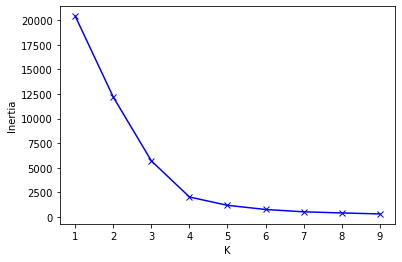

In [686]:
from sklearn.cluster import KMeans

inertia1 = []
K = range(1, 10)
  
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_surveyp1)
    inertia1.append(km.inertia_)
    
plt.plot(K, inertia1, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [687]:
km1 = sklearn.cluster.KMeans(n_clusters=4)
labels1 = km1.fit_predict(df_surveyp1)
labelsDf1 = pd.DataFrame(labels1, columns=['cluster'])
labelsDf1.index = df_surveyp1.index
labelsDf1

,cluster
Occupant Number,
1.0,1
1.0,1
1.0,1
1.0,1
1.0,1
...,...
24.0,1
24.0,1
24.0,1


In [688]:
df_surveyp1['cluster'] = labelsDf1['cluster']
df_surveyp1

C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\3894947784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surveyp1['cluster'] = labelsDf1['cluster']


,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,cluster
Occupant Number,,,
1.0,2.0,4.0,1
1.0,2.0,4.0,1
1.0,2.0,4.0,1
1.0,2.0,4.0,1
1.0,2.0,4.0,1
...,...,...,...
24.0,2.0,4.0,1
24.0,2.0,4.0,1
24.0,2.0,4.0,1


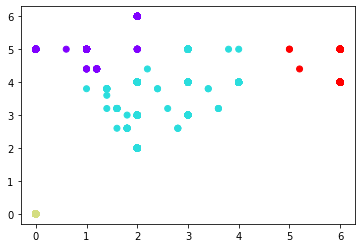

In [690]:
plt.scatter(df_surveyp1['Wishes set point to stay at setting they choose'], df_surveyp1['Chooses set point that is most agreeable to OTHERS'], c=df_surveyp1['cluster'], cmap='rainbow')

<AxesSubplot:xlabel='Wishes set point to stay at setting they choose', ylabel='Chooses set point that is most agreeable to OTHERS'>

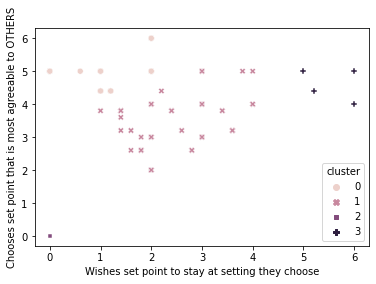

In [691]:
sns.scatterplot(data=df_surveyp1, x='Wishes set point to stay at setting they choose', y='Chooses set point that is most agreeable to OTHERS', hue='cluster', style='cluster')

**cluster 0 has 7 occupants who choose setpoints that are more agreeable to others**

**cluster 1 has 12 occupants have more balanced preference**

**cluster 2 has 1 occupant but is void**

**cluster 3 has 4 occupants and are more inclined to have setpoints of their preference**

In [1]:
labelsDf1['occupant number'] = labelsDf1.index 
labelsDf1 = labelsDf1.drop_duplicates(subset=['occupant number'])
labelsDf1

NameError: name 'labelsDf1' is not defined

In [685]:
df_surveyp2 = df_survey1[['Chooses set point that is most ENERGY EFFICIENT', 'Chooses set point most in line with MGMT policies']]
df_surveyp2.index = df_survey1['Occupant Number']
df_surveyp2

,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies
Occupant Number,,
1.0,2.0,2.0
1.0,2.0,2.0
1.0,2.0,2.0
1.0,2.0,2.0
1.0,2.0,2.0
...,...,...
24.0,4.0,0.0
24.0,4.0,0.0
24.0,4.0,0.0


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


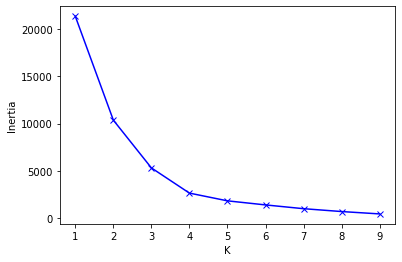

In [720]:
inertia2 = []
K2 = range(1, 10)
  
for k in K2:
    km2 = KMeans(n_clusters=k)
    km2.fit(df_surveyp2)
    inertia2.append(km2.inertia_)
    
plt.plot(K2, inertia2, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [694]:
km2 = sklearn.cluster.KMeans(n_clusters=4)
labels2 = km2.fit_predict(df_surveyp2)
labelsDf2 = pd.DataFrame(labels2, columns=['cluster'])
labelsDf2.index = df_surveyp2.index
labelsDf2

,cluster
Occupant Number,
1.0,1
1.0,1
1.0,1
1.0,1
1.0,1
...,...
24.0,1
24.0,1
24.0,1


In [698]:
labelsDf2['occupant number'] = labelsDf2.index 
labelsDf2 = labelsDf2.drop_duplicates(subset=['occupant number'])
labelsDf2

,cluster,occupant number
Occupant Number,,
1.0,1,1.0
2.0,2,2.0
3.0,3,3.0
4.0,3,4.0
5.0,3,5.0
6.0,3,6.0
7.0,2,7.0
8.0,1,8.0
9.0,1,9.0


In [695]:
df_surveyp2['cluster'] = labelsDf2['cluster']
df_surveyp2

C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\745786313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surveyp2['cluster'] = labelsDf2['cluster']


,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,cluster
Occupant Number,,,
1.0,2.0,2.0,1
1.0,2.0,2.0,1
1.0,2.0,2.0,1
1.0,2.0,2.0,1
1.0,2.0,2.0,1
...,...,...,...
24.0,4.0,0.0,1
24.0,4.0,0.0,1
24.0,4.0,0.0,1


<AxesSubplot:xlabel='Chooses set point that is most ENERGY EFFICIENT', ylabel='Chooses set point most in line with MGMT policies'>

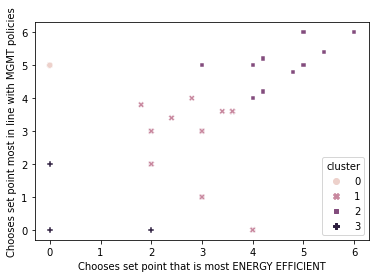

In [697]:
sns.scatterplot(data=df_surveyp2, x='Chooses set point that is most ENERGY EFFICIENT', y='Chooses set point most in line with MGMT policies', hue='cluster', style='cluster')

In [715]:
df_surveyp3 = df_survey_full[['Min. Accept. Sensation (right now)', 'Max. Accept. Sensation (right now)']]
df_surveyp3.index = df_surveyp2.index
df_surveyp3

,Min. Accept. Sensation (right now),Max. Accept. Sensation (right now)
Occupant Number,,
1.0,-2.5,0.0
1.0,-2.0,0.0
1.0,-2.0,1.0
1.0,-2.0,1.0
1.0,-2.0,0.0
...,...,...
24.0,-1.0,0.0
24.0,0.0,0.0
24.0,-1.0,0.0


C:\Users\pdongre\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


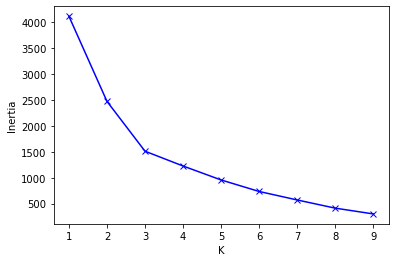

In [721]:
inertia3 = []
K3 = range(1, 10)
  
for k in K3:
    km3 = KMeans(n_clusters=k)
    km3.fit(df_surveyp3)
    inertia3.append(km3.inertia_)
    
plt.plot(K3, inertia3, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [722]:
km3 = sklearn.cluster.KMeans(n_clusters=3)
labels3 = km3.fit_predict(df_surveyp3)
labelsDf3 = pd.DataFrame(labels3, columns=['cluster'])
labelsDf3.index = df_surveyp3.index
labelsDf3

,cluster
Occupant Number,
1.0,2
1.0,2
1.0,0
1.0,0
1.0,2
...,...
24.0,2
24.0,1
24.0,2


In [723]:
labelsDf3['occupant number'] = labelsDf3.index 
labelsDf3 = labelsDf3.drop_duplicates(subset=['occupant number'])
labelsDf3

,cluster,occupant number
Occupant Number,,
1.0,2,1.0
2.0,0,2.0
3.0,1,3.0
4.0,0,4.0
5.0,0,5.0
6.0,0,6.0
7.0,0,7.0
8.0,2,8.0
9.0,2,9.0


In [724]:
df_surveyp3['cluster'] = labelsDf3['cluster']
df_surveyp3

C:\Users\pdongre\AppData\Local\Temp\ipykernel_24488\2268804400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surveyp3['cluster'] = labelsDf3['cluster']


,Min. Accept. Sensation (right now),Max. Accept. Sensation (right now),cluster
Occupant Number,,,
1.0,-2.5,0.0,2
1.0,-2.0,0.0,2
1.0,-2.0,1.0,2
1.0,-2.0,1.0,2
1.0,-2.0,0.0,2
...,...,...,...
24.0,-1.0,0.0,2
24.0,0.0,0.0,2
24.0,-1.0,0.0,2


<AxesSubplot:xlabel='Min. Accept. Sensation (right now)', ylabel='Max. Accept. Sensation (right now)'>

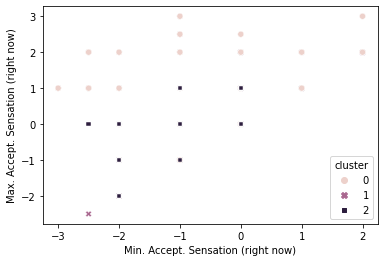

In [726]:
sns.scatterplot(data=df_surveyp3, x='Min. Accept. Sensation (right now)', y='Max. Accept. Sensation (right now)', hue='cluster', style='cluster')